In [1]:
from pathlib import Path

In [2]:
train = Path('train_dehaze/')
test = Path('leaderboard_test_data_dehaze/')
holdout = Path('leaderboard_holdout_data_dehaze/')

In [3]:
train_names = [f for f in train.iterdir()]
test_names = [f for f in test.iterdir()]
holdout_names = [f for f in holdout.iterdir()]

In [4]:
fname = train_names[0]; fname

PosixPath('train_dehaze/img_000002017.jpg')

In [8]:
from PIL import Image
from PIL import ImageEnhance

In [37]:
fname

PosixPath('train_dehaze/img_000002017.jpg')

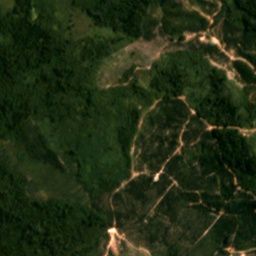

In [39]:
Image.open(fname)

In [38]:
def increase_brightness(fname, factor=1.8):
    img = ImageEnhance.Brightness(Image.open(fname)).enhance(factor)
    img.save(fname)

In [40]:
increase_brightness(fname)

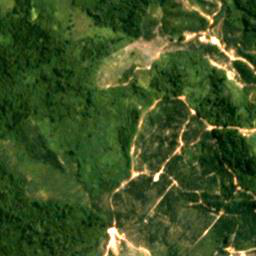

In [41]:
Image.open(fname)

In [5]:
from  concurrent.futures import ProcessPoolExecutor

In [43]:
%time with ProcessPoolExecutor(10) as e: e.map(increase_brightness, train_names)

CPU times: user 2.55 s, sys: 871 ms, total: 3.43 s
Wall time: 8.25 s


In [48]:
%time with ProcessPoolExecutor(10) as e: e.map(increase_brightness, test_names)

CPU times: user 713 ms, sys: 348 ms, total: 1.06 s
Wall time: 2.41 s


In [49]:
%time with ProcessPoolExecutor(10) as e: e.map(increase_brightness, holdout_names)

CPU times: user 429 ms, sys: 168 ms, total: 597 ms
Wall time: 1.32 s
